In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# Any results you write to the current directory are saved as output.

In [12]:
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras

In [13]:
image_directory = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/'
SIZE = 64
dataset = []    
label = []  



In [14]:
parasitized_images = os.listdir(image_directory + 'Parasitized/')
for i, image_name in enumerate(parasitized_images):    
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)


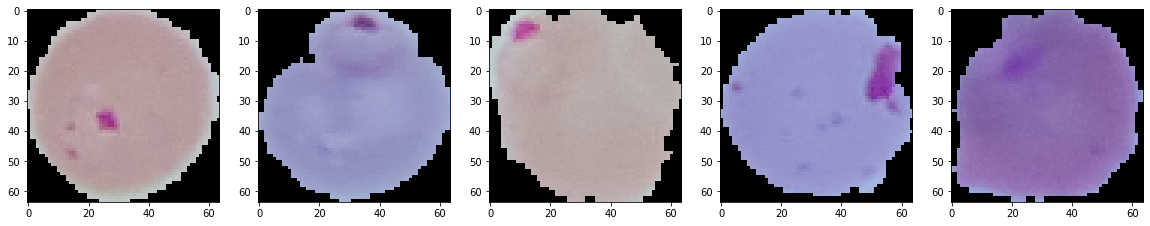

In [26]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

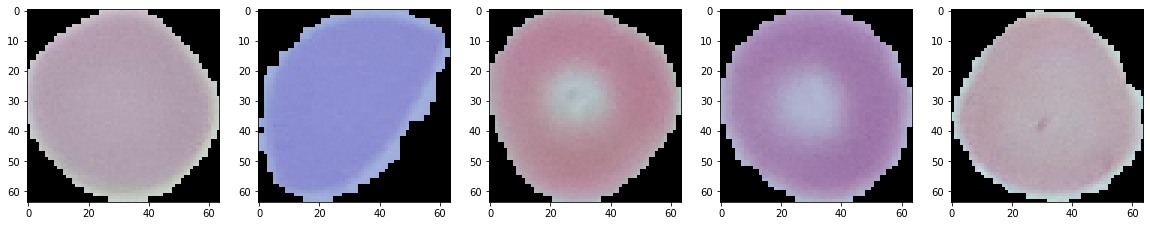

In [27]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

In [15]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [16]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)       

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)




In [23]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 50, 
                         verbose = 1, 
                         epochs = 20,      
                         validation_split = 0.1,
                         shuffle = False
                      
                     )





Train on 19841 samples, validate on 2205 samples
Epoch 1/20
19841/19841 [==============================] - 5s 269us/step - loss: 0.0389 - accuracy: 0.9857 - val_loss: 0.1884 - val_accuracy: 0.9474
Epoch 2/20
19841/19841 [==============================] - 5s 264us/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 0.2082 - val_accuracy: 0.9578
Epoch 3/20
19841/19841 [==============================] - 5s 266us/step - loss: 0.0279 - accuracy: 0.9904 - val_loss: 0.1969 - val_accuracy: 0.9578
Epoch 4/20
19841/19841 [==============================] - 5s 273us/step - loss: 0.0209 - accuracy: 0.9925 - val_loss: 0.2097 - val_accuracy: 0.9519
Epoch 5/20
19841/19841 [==============================] - 5s 262us/step - loss: 0.0143 - accuracy: 0.9944 - val_loss: 0.2203 - val_accuracy: 0.9533
Epoch 6/20
19841/19841 [==============================] - 5s 263us/step - loss: 0.0156 - accuracy: 0.9940 - val_loss: 0.2353 - val_accuracy: 0.9574
Epoch 7/20
19841/19841 [==============================] - 5s 26

In [24]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))






5512/5512 [==============================] - 1s 121us/step
Test_Accuracy: 94.39%


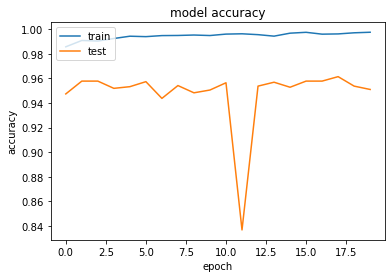

In [25]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
